## **Moving Averages**
In this tutorial, we will explore the details of data averaging using:
1. Simple Moving Average (SMA)
2. Cumulative Moving Average (CMA)
3. Ordinary Exponentially-Weighted Moving Average (EWMA)
4. EWMA Averaging With Bias Correction

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Load the csv file (Monthly average air temperatures of the city of Barcelona since 1780) into a pandas data frame
df_temperature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS465_Term212/ANNs_Labs/Datasets/temperaturesbarcelonasince1780.csv', encoding = 'utf-8')

# Visualize first 5 rows
df_temperature.head()

,Any,Temp_Mitjana_Gener,Temp_Mitjana_Febrer,Temp_Mitjana_Marc,Temp_Mitjana_Abril,Temp_Mitjana_Maig,Temp_Mitjana_Juny,Temp_Mitjana_Juliol,Temp_Mitjana_Agost,Temp_Mitjana_Setembre,Temp_Mitjana_Octubre,Temp_Mitjana_Novembre,Temp_Mitjana_Desembre
0,1780,6.7,7.3,11.6,11.4,16.3,19.1,21.4,22.0,20.3,16.3,9.2,7.3
1,1781,7.5,8.9,10.9,13.7,16.8,18.0,22.0,22.6,19.1,15.0,11.8,10.3
2,1782,8.2,6.1,9.8,10.5,15.4,20.1,22.3,22.6,19.9,13.8,7.4,7.5
3,1783,8.3,8.6,9.6,12.4,15.0,19.1,22.9,21.4,18.6,15.5,11.0,10.4
4,1784,7.3,7.1,10.8,10.7,16.7,20.7,22.0,20.5,20.0,13.8,8.5,5.3


In [5]:
# Basic data summary
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Any                    242 non-null    int64  
 1   Temp_Mitjana_Gener     242 non-null    float64
 2   Temp_Mitjana_Febrer    242 non-null    float64
 3   Temp_Mitjana_Marc      242 non-null    float64
 4   Temp_Mitjana_Abril     242 non-null    float64
 5   Temp_Mitjana_Maig      242 non-null    float64
 6   Temp_Mitjana_Juny      242 non-null    float64
 7   Temp_Mitjana_Juliol    242 non-null    float64
 8   Temp_Mitjana_Agost     242 non-null    float64
 9   Temp_Mitjana_Setembre  242 non-null    float64
 10  Temp_Mitjana_Octubre   242 non-null    float64
 11  Temp_Mitjana_Novembre  242 non-null    float64
 12  Temp_Mitjana_Desembre  242 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 24.7 KB


In [6]:
# Set year column as index
df_temperature.set_index('Any', inplace = True)

# Translate index name into English
df_temperature.index.name = 'year'

# Calculate the yearly average air temperature
df_temperature['average_temperature'] = df_temperature.mean(axis = 1)

# Drop columns containing monthly values
df_temperature = df_temperature[['average_temperature']]

# Visualize the first 5 columns
df_temperature.head()

,average_temperature
year,
1780,14.075000
1781,14.716667
1782,13.633333
1783,14.400000
1784,13.616667


Text(0, 0.5, 'Temperature [°C]')

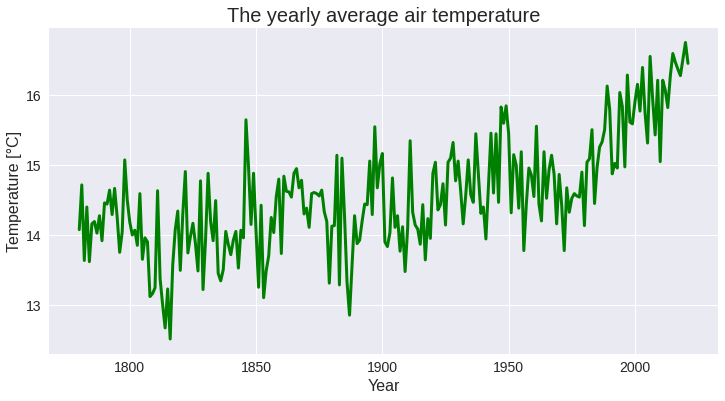

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

# Plot the yearly average air temperature
df_temperature.plot(color = 'green', linewidth = 3, figsize = (12, 6))

# Modify ticks size
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend('')

plt.title('The yearly average air temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature [°C]', fontsize = 16)

## Simple Moving Average (SMA)

The simple moving average (SMA) is the **unweighted mean** of the previous K data points. The selection of the **sliding window** width, K, depends on the **amount of smoothing desired** since increasing the value of K improves the smoothing at the expense of accuracy.

Given a sequence of m data points, , $ \{ \mathbb{s}_{1}, \mathbb{s}_{2}, \mathbb{s}_{3}, \ldots, \mathbb{s}_{m}\} $, we calculate the SMA value at time period k as follows:

$$
\mu_{SMA}^{[k]} = \frac{\mathbb{s}_{k} + \mathbb{s}_{k-1} + 
\mathbb{s}_{k-2} + \cdots + \mathbb{s}_{k-(K-1)}}{K}
$$

**Note:** We can calculate the SMA at instant k using the **pandas.Series.rolling** function. **rolling** provides rolling (sliding) windows over the data. Data within each window width, can be evaluated using any statistical measure (e.g., the **mean measure**). The width of the sliding window is specified in the **window** argument. 

For instance, using **df_temperature.rolling(10).mean()** will produce values of the SMA using 10 data samples. In this case, it should be noted that the first 9 SMA values will be 0!

**Note:** To get non-null values, we can set the **min_periods** argument to 1 as follows: **df_temperature.rolling(10, min_periods = 1).mean()**

In [8]:
# Let us calculate the SMA for periords o5 5, 10, 15 and 20 years
df_temperature['SMA_5'] = df_temperature.average_temperature.rolling(5, min_periods = 1).mean()
df_temperature['SMA_10'] = df_temperature.average_temperature.rolling(10, min_periods = 1).mean()
df_temperature['SMA_15'] = df_temperature.average_temperature.rolling(15, min_periods = 1).mean()
df_temperature['SMA_20'] = df_temperature.average_temperature.rolling(20, min_periods = 1).mean()

Text(0, 0.5, 'Temperature [°C]')

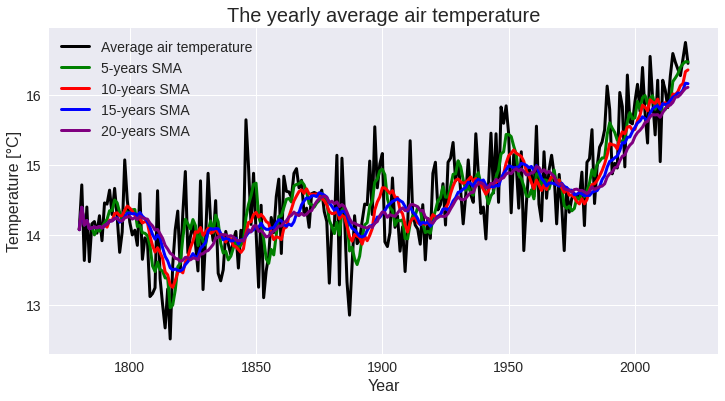

In [9]:
# Plotting colors
colors = ['black', 'green', 'red', 'blue', 'purple']

df_temperature.plot(color = colors, linewidth = 3, figsize = (12, 6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', '5-years SMA', '10-years SMA', '15-years SMA', '20-years SMA'], fontsize = 14)

plt.title('The yearly average air temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature [°C]', fontsize = 16)

## Cumulative Moving Average (CMA)

The Cumulative Moving Average (CMA) is the unweighted mean of the previous values up to the current time k.

While the SMA has a sliding window of fixed width K, the window width in the CMA calculations averages becomes larger as the time passes when computing the CMA values.

$$
\mu_{CMA}^{[k]} = \frac{\mathbb{s}_{1} + \mathbb{s}_{2} + \mathbb{s}_{3} + \cdots + \mathbb{s}_{k}}{k}
$$

**Note:** We can calculate the CMA at instant k using the **pandas.Series.expanding** function. However, we do not need to specify the window width as it is variable. To avoid null values, we can set the **min_periods** argument to 1 as follows: **df_temperature.expanding(min_periods = 1).mean()**. By the way, the default value of this parameter is 1.

In [10]:
df_temperature['CMA'] = df_temperature.average_temperature.expanding().mean()

Text(0, 0.5, 'Temperature [°C]')

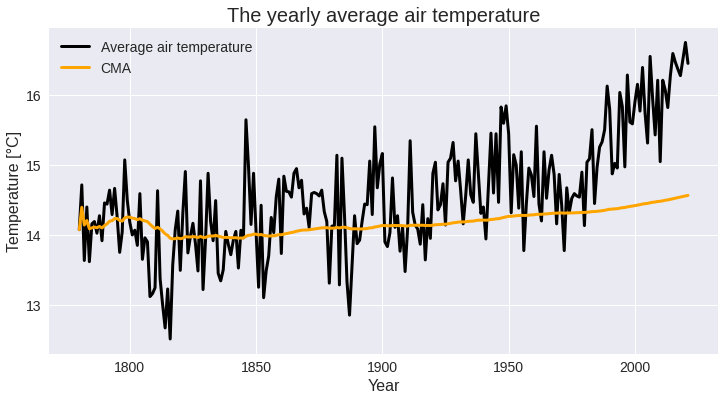

In [11]:
colors = ['black', 'orange']

df_temperature[['average_temperature', 'CMA']].plot(color = colors, linewidth = 3, figsize = (12, 6))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average air temperature', 'CMA'], fontsize = 14)

# title and labels
plt.title('The yearly average air temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature [°C]', fontsize = 16)

**Note:** As the CMA averages take into account all preceding values, they fail to reveal any trends in the data especially for datasets spanning long periods. In this case, SMA averages are preferred over CMA ones for this purpose. 

## Exponentially-Weighted Moving Average (EWMA) 
In SMA averages, all data points considered are equally weighted. To highlight recent observations, we can use the exponentially-weighted moving average (EWMA) which applies more weight to the most recent data points. This variable weighting allows EWMA averages to capture faster any change in the data!
To calculate the EWMA at instant k, we will use the following formula:
$$
\mu_{EWMA}^{[k]}  = \left\{ 
\begin{matrix} 
0 & k = 0 \\
\beta \; \mu_{EWMA}^{[k-1]}  + (1 - \beta) \; \mathbb{s}_{k} & k > 0
\end{matrix}
\right.
$$

where:
1. $ \mathbb{s}_{k} $ is the data sample at instant k.
2. $ \mu_{EWMA}^{[k]}  $ is the EMWA average at instant k.
3. $ \beta $ is the **decay factor**. The smoothing factor has a value between 0 and 1 and represents the **weights applied** to the most recent data samples. 

**Note 1:** The number of data samples considered in each EWMA calculation is propoptional to the inverse of $ \beta $. Therefore, setting $ \beta $ to 0.9 would involve the most 10 recent data samples in the EMWA calculation.  

**Note 2:** To calculate the EMWA averages, we will use the **pandas.Series.ewm** function. We can specify $ \beta $ as $ 1 - \beta $ in the **alpha** parameter. Alternatively, we can specify it in terms of the **center of mass**, **span**, or **half-life**. We can also set the **adjust** parameter to **False**. 

$$
\mu_{EWMA}^{[k]}   = \left\{ 
\begin{matrix} 
0 & k = 0 \\
(1 - \alpha) \; \mu_{EWMA}^{[k-1]}  + \alpha \; \mathbb{s}_{k} & k > 0
\end{matrix}
\right.
$$

In [35]:
df_temperature['EWMA_0.98'] = df_temperature.average_temperature.ewm(alpha = 0.02, adjust = False).mean()
df_temperature['EWMA_0.9'] = df_temperature.average_temperature.ewm(alpha = 0.1, adjust = False).mean()
df_temperature['EWMA_0.5'] = df_temperature.average_temperature.ewm(alpha = 0.5, adjust = False).mean()

Text(0, 0.5, 'Temperature [°C]')

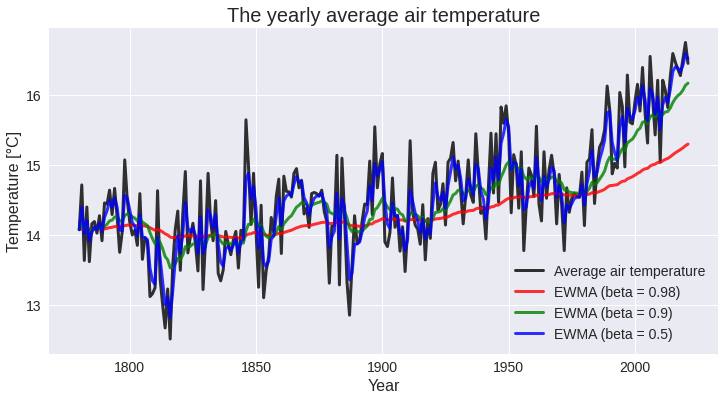

In [36]:
colors = ['black', 'red', 'green', 'blue']

df_temperature[['average_temperature', 'EWMA_0.98', 'EWMA_0.9', 'EWMA_0.5']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Average air temperature', 'EWMA (beta = 0.98)', 'EWMA (beta = 0.9)', 'EWMA (beta = 0.5)'], fontsize = 14)

# title and labels
plt.title('The yearly average air temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature [°C]', fontsize = 16)

Text(0, 0.5, 'Temperature [°C]')

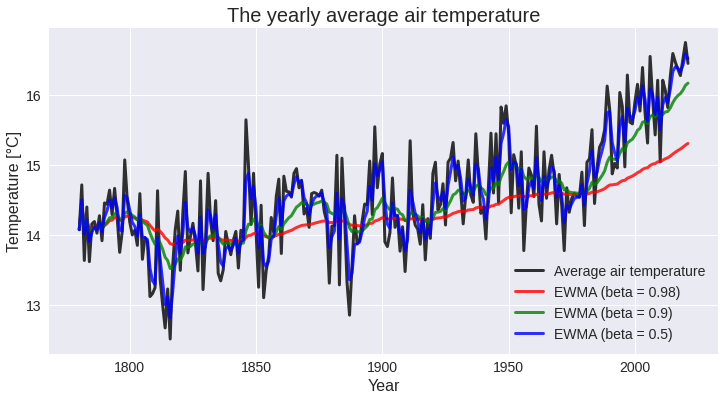

In [37]:
# We can use third-party libraries such as Alpha Vantage
df_temperature['EWMA_0.98_Adj'] = df_temperature.average_temperature.ewm(alpha = 0.02, adjust = True).mean()
df_temperature['EWMA_0.9_Adj'] = df_temperature.average_temperature.ewm(alpha = 0.1, adjust = True).mean()
df_temperature['EWMA_0.5_Adj'] = df_temperature.average_temperature.ewm(alpha = 0.5, adjust = True).mean()

colors = ['black', 'red', 'green', 'blue']

df_temperature[['average_temperature', 'EWMA_0.98_Adj', 'EWMA_0.9_Adj', 'EWMA_0.5_Adj']].plot(color = colors, linewidth = 3, figsize = (12, 6), alpha = 0.8)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(labels = ['Average air temperature', 'EWMA (beta = 0.98)', 'EWMA (beta = 0.9)', 'EWMA (beta = 0.5)'], fontsize = 14)

# title and labels
plt.title('The yearly average air temperature', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Temperature [°C]', fontsize = 16)

Given m data samples, $\{ \mathbb{s}_{1}, \mathbb{s}_{2}, \mathbb{s}_{3}, \ldots, \mathbb{s}_{m} \} $, we can compute their average in several ways.
The exponentially-weighted moving average (EWMA) is one of the
possible methods to get the moving average of the m samples. The EMWA is implemented as follows:
1. **Step 1 (Initialization):** Set the initial guess of the average, $ \mu^{[0} $, to 0. Set the **decay factor**, $ \beta $, to a value between 0 and 1. The value of $ \beta $ is inversely proportional to the number of samples used in the EMWA calculations ($ \bf{\mbox{num_samples}} = \frac{1}{1-\beta}$).
2. **Step 2 (Iterations):** At time step k, compute the EMWA average using:
$$
\mu^{[k]} = \beta \; \mu^{[k-1]} + (1 - \beta) \; s_{k}
$$

**Example:** Let us "unwrap" the EMWA for the first few steps as follows
$$
\mu^{[0]} = 0 \\
\mu^{[1]} = \beta \; \mu^{[0]} + (1-\beta) \; \mathbb{s}_{1}  = (1 - \beta) \; \mathbb{s}_{1} 
\\
\mu^{[2]} = \beta \; \mu^{[1]}  + (1-\beta) \; \mathbb{s}_{2} =  \beta \; (1-\beta) \; \mathbb{s}_{1} + (1-\beta) \; \mathbb{s}_{2} \\
\mu^{[3]} = \beta \; \mu^{[2]}  + (1-\beta) \; \mathbb{s}_{3} =  \beta \; 
\left[ \beta \; (1-\beta) \; \mathbb{s}_{1} + (1-\beta) \; \mathbb{s}_{2}\right] + (1-\beta) \; \mathbb{s}_{3} \\
\mu^{[3]} = \beta^{2} \; (1-\beta) \; \mathbb{s}_{1} + \beta \; (1-\beta) \; \mathbb{s}_{2} + (1-\beta) \; \mathbb{s}_{3} \\
\mu^{[4]} = \beta^{3} \; (1-\beta) \; \mathbb{s}_{1} + \beta^{2} \; (1-\beta) \; \mathbb{s}_{2} + \beta \; (1-\beta) \; \mathbb{s}_{3} + (1-\beta) \; \mathbb{s}_{4} \\
\cdots \cdots \cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots\cdots \cdots \\
\mu^{[k]} = \beta^{k-1} \; (1-\beta) \; \mathbb{s}_{1} + \beta^{k-2} \; (1-\beta) \; \mathbb{s}_{2} + \beta^{k-3} \; (1-\beta) \; \mathbb{s}_{3} +  \cdots +  (1-\beta) \; \mathbb{s}_{k}
$$

**Note:** At iteration k = 1, our average depends only on the data sample $ \mathbb{s}_{1} $ as we cannot "trust" our average guess at such initial stage!

In [42]:
temps = df_temperature['average_temperature'].to_numpy()
beta098 = 0.98
mus_098 = np.zeros(temps.shape[0]+1)
beta09 = 0.9
mus_09 = np.zeros(temps.shape[0]+1)
beta05 = 0.5
mus_05 = np.zeros(temps.shape[0]+1)

In [43]:
for i in np.arange(0, len(temps)):
  mus_09[i+1] = beta09 * mus_09[i] + (1-beta09) * temps[i]
  mus_098[i+1] = beta098 * mus_098[i] + (1-beta098) * temps[i]
  mus_05[i+1] = beta05 * mus_05[i] + (1-beta05) * temps[i] 

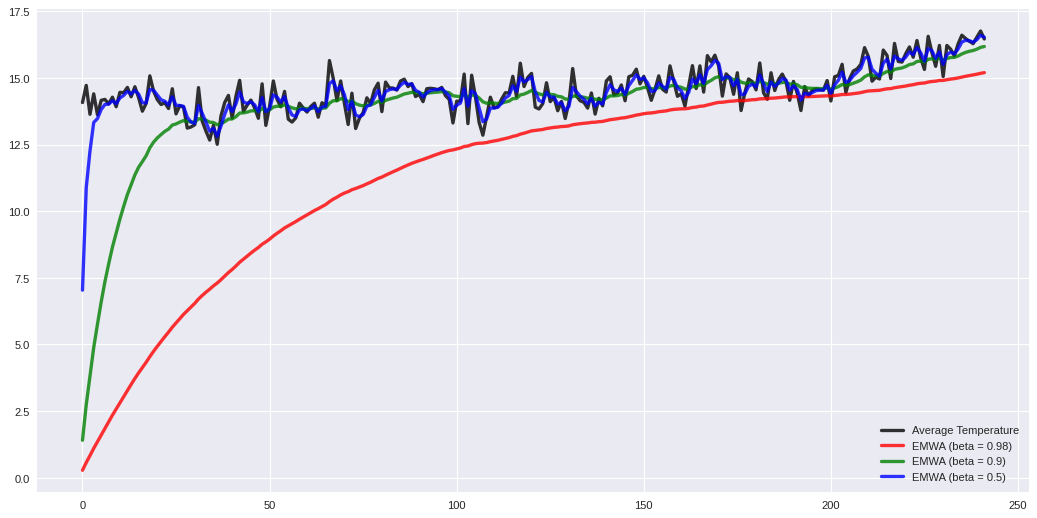

In [45]:
from matplotlib.pyplot import figure
figure(figsize = (16, 8), dpi = 80)
colors = ['black', 'red', 'green', 'blue']

plt.plot(temps, color = 'black', linewidth = 3, alpha = 0.8, label = 'Average Temperature')
plt.plot(mus_098[1:], color = 'red', linewidth = 3, alpha = 0.8, label = 'EMWA (beta = 0.98)')
plt.plot(mus_09[1:], color = 'green', linewidth = 3, alpha = 0.8, label = 'EMWA (beta = 0.9)')
plt.plot(mus_05[1:], color = 'blue', linewidth = 3, alpha = 0.8, label = 'EMWA (beta = 0.5)')
plt.legend()
plt.show()

**Note:** The EWMA average based on a smaller number of data samples $ \beta = 0.5 \longrightarrow \; \mathbf{2} \; \bf{\mbox{data samples}} $ is able to respond faster to the changes in the data and, therefore, is able to capture any trends in the data sooner that the EMWA averages that are based on more data samples such as $ \beta = 0.9 \longrightarrow \; \mathbf{10} \; \bf{\mbox{data samples}} $ and $ \beta = 0.98 \longrightarrow \; \mathbf{50} \; \bf{\mbox{data samples}} $

## Bias Correction
Let us consider the first four data samples, $ \mathbb{s}_{1} $, $ \mathbb{s}_{2} $, $ \mathbb{s}_{3} $ and $ \mathbb{s}_{4} $ and let $ \beta = 0.98 $. Then, we will have the following EWMA averages:
$$
\mu_{1} = 0.98 \cdot 0 + 0.02 \cdot \mathbb{s}_{1} = 0.02 \cdot \mathbb{s}_{1}
% 0 + 0.02 \cdot 14.075 = 0.2815
$$

$$
\mu_{2} = 0.98 \cdot \mu_{1} + 0.02 \cdot \mathbb{s}_{2} = 0.98 \cdot 0.02 \cdot \mathbb{s}_{1} + 0.02 \cdot \mathbb{s}_{2} = 0.0196 \cdot \mathbb{s}_{1} + 0.02 \cdot \mathbb{s}_{2}
% 14.716 = 0.275 + 0.02 \cdot 14.716 = 0.275 + 0.294 = 0.569
$$

$$
\mu_{3} = 0.98 \cdot \mu_{2} + 0.02 \cdot \mathbb{s}_{3} = 0.98 \cdot (0.0196 \cdot \mathbb{s}_{1} + 0.02 \cdot \mathbb{s}_{2}) + + 0.02 \cdot \mathbb{s}_{3} \\
\mu_{3} = 0.0192 \cdot \mathbb{s}_{1} + 0.0196 \cdot \mathbb{s}_{2} + 0.02 \cdot \mathbb{s}_{3}
$$

$$
\mu_{4} = 0.98 \cdot \mu_{3} + 0.02 \cdot \mathbb{s}_{4} = 0.98 \cdot (0.0192 \cdot \mathbb{s}_{1} + 0.0196 \cdot \mathbb{s}_{2} + 0.02 \cdot \mathbb{s}_{3}) + 0.02 \cdot \mathbb{s}_{4}  \\
\mu_{4} = 0.018 \cdot \mathbb{s}_{1} + 0.019 \cdot \mathbb{s}_{2} + 0.0196 \cdot \mathbb{s}_{3} + 0.02 \cdot \mathbb{s}_{4}
$$
As you can see, the EMWA averages are not really weighted averages of the data samples uo to time step k! Therefore, let us fox this issue and apply a **bias correction** step:

$$
\mu_{k}^{[bc]} = \frac{\mu_{k}}{1-\beta^{k}}
$$
where $ \mu_{k}^{[bc]} $ is the bias-corrected EWMA at time step k.

**Important Note:** Make sure to keep track of both $ \mu_{k} $ and $ \mu_{k}^{]bc]} $ values as the the last update in the equation above involves both quantities!

**Detailed Example:** Given our four data samples, the **bias-corrected EWMA** averages are as follows:

$$
\mu_{1}^{[bc]} = \frac{0.02 \cdot \mathbb{s}_{1}}{1 - 0.98^{1}} = \frac{0.02 \cdot \mathbb{s}_{1}}{0.02} = \mathbb{s}_{1} 
$$

**Note:** Unlike the ordinary EWMA average, the bias-corrected EWMA average is able to capture the trend in the data samples as $ \mu_{1}^{[bc]} = \mathbb{s}_{1} $ while $ \mu_{1} = 0.02 \cdot \mathbb{s}_{1} $ when $ \beta = 0.98 $!

$$
\mu_{2}^{[bc]} = \frac{0.0196 \cdot \mathbb{s}_{1} + 0.02 \cdot \mathbb{s}_{2}}{1 - 0.98^{2}} = \frac{0.0196 \cdot \mathbb{s}_{1} + 0.02 \cdot \mathbb{s}_{2}}{0.0396} 
$$

**Note:** $ \mu_{2}^{[bc]} $ is a weighted average of $ \mathbb{s}_{1} $ and $ \mathbb{s}_{2} $!

$$
\mu_{3}^{[bc]} = \frac{0.0192 \cdot \mathbb{s}_{1} + 0.0196 \cdot \mathbb{s}_{2} + 0.02 \cdot \mathbb{s}_{3}}{1 - 0.98^{3}} = \frac{0.0192 \cdot \mathbb{s}_{1} + 0.0196 \cdot \mathbb{s}_{2} + 0.02 \cdot \mathbb{s}_{3}}{0.0588}
$$

**Note:** $ \mu_{3}^{[bc]} $ is a weighted average of $ \mathbb{s}_{1} $, $ \mathbb{s}_{2} $ and $ \mathbb{s}_{3} $!

$$
\mu_{4}^{[bc]} = \frac{0.018 \cdot \mathbb{s}_{1} + 0.0192 \cdot \mathbb{s}_{2} + 0.0196 \cdot \mathbb{s}_{3} + 0.02 \cdot \mathbb{s}_{4}}{1 - 0.98^{4}} $$ 
$$
\mu_{4}^{[bc]} = \frac{0.018 \cdot \mathbb{s}_{1} + 0.0192 \cdot \mathbb{s}_{2} + 0.0196 \cdot \mathbb{s}_{3} + 0.02 \cdot \mathbb{s}_{4}}{0.077}
$$

**Note:** $ \mu_{4}^{[bc]} $ is a weighted average of $ \mathbb{s}_{1} $, $ \mathbb{s}_{2} $, $ \mathbb{s}_{3} $ and $ \mathbb{s}_{4} $!

**Note**: The EWMA average is weighted toward the most recent data sample used (e.g., $ \mathbb{s}_{4} $ gets more weight than $ \mathbb{s}_{1} $ in the calculation of $ \mu_{4} $).

In [32]:
beta09 = 0.9
# mus_09 = np.zeros_like(temps)
mus_09 = np.zeros(temps.shape[0] + 1)
mus_09_corr = np.zeros(temps.shape[0]+1)
beta098 = 0.98
mus_098 = np.zeros(temps.shape[0] + 1)
mus_098_corr = np.zeros(temps.shape[0] + 1)
beta05 = 0.5
mus_05 = np.zeros(temps.shape[0] + 1)
mus_05_corr = np.zeros(temps.shape[0] + 1)


for i in np.arange(0, len(temps)):
  mus_098[i+1] = (beta098 * mus_098[i] + ((1-beta098) * temps[i]))
  mus_098_corr[i+1] = mus_098[i+1] / (1 - beta098**(i+1))
  mus_09[i+1] = (beta09 * mus_09[i] + ((1-beta09) * temps[i]))
  mus_09_corr[i+1] = mus_09[i+1] / (1 - beta09**(i+1))
  mus_05[i+1] = (beta05 * mus_05[i] + ((1-beta05) * temps[i]))
  mus_05_corr[i+1] = mus_05[i+1] / (1 - beta05**(i+1))


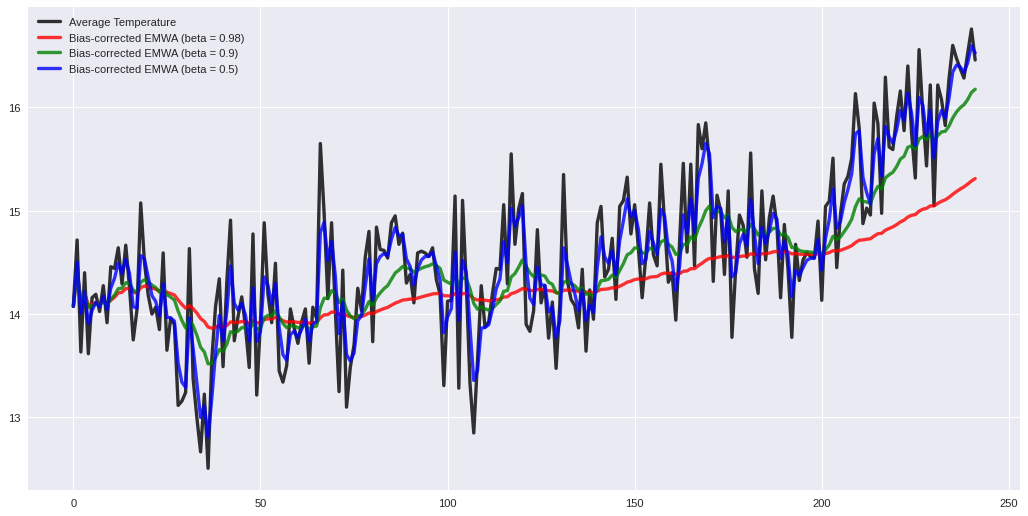

In [47]:
figure(figsize = (16, 8), dpi = 80)

plt.plot(temps, color = 'black', linewidth = 3, alpha = 0.8, label = 'Average Temperature')
plt.plot(mus_098_corr[1:], color = 'red', linewidth = 3, alpha = 0.8, label = 'Bias-corrected EMWA (beta = 0.98)')
plt.plot(mus_09_corr[1:], color = 'green', linewidth = 3, alpha = 0.8, label = 'Bias-corrected EMWA (beta = 0.9)')
plt.plot(mus_05_corr[1:], color = 'blue', linewidth = 3, alpha = 0.8, label = 'Bias-corrected EMWA (beta = 0.5)')
plt.legend()
plt.show()

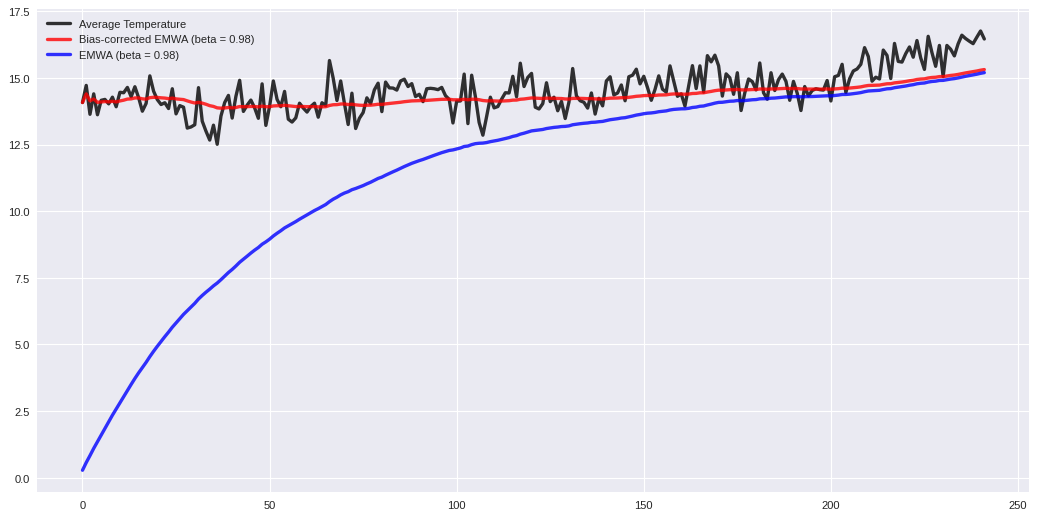

In [49]:
figure(figsize = (16, 8), dpi = 80)

plt.plot(temps, color = 'black', linewidth = 3, alpha = 0.8, label = 'Average Temperature')
plt.plot(mus_098_corr[1:], color = 'red', linewidth = 3, alpha = 0.8, label = 'Bias-corrected EMWA (beta = 0.98)')
plt.plot(mus_098[1:], color = 'blue', linewidth = 3, alpha = 0.8, label = 'EMWA (beta = 0.98)')
plt.legend()
plt.show()

**Note:** As you can note from the plot above, unlike the ordinary EWMA average, the bias-corrected one is able to instantly capture the trend in the data samples